### Outputs from tempest_extremes tool

In [1]:
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm
import sys, os, argparse
import bottleneck

In [3]:
import pandas as pd
fname="IFS_4.4-FESOM_5_z500_day.nc"
inpath="/scratch/b/b382006/nextgems/cycle3/IFS_4.4-FESOM_5/z500/daily/"

ds_test=xr.open_dataset(inpath+fname, decode_cf=False)
yr = 1988 # year
#dates = pd.date_range(start=str(yr), end=str(yr+1), freq='6H')
#ds_test.assign_coords(time=dates[:2])
#ds_test.time.encoding['units'] = "seconds since 1970-01-01 00:00:00"
#ds_test.time.encoding['calendar'] = "proleptic_gregorian"

ds_test

<xarray.Dataset>
Dimensions:    (time: 1809, bnds: 2, lon: 360, lat: 181)
Coordinates:
  * time       (time) float64 6.0 27.0 51.0 ... 4.335e+04 4.337e+04 4.339e+04
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    z          (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    frequency:    day
    history:      Tue Aug 08 15:35:22 2023: cdo -b F32 daymean /scratch/b/b38...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [14]:
#xr_in['time'].attrs['units']= 'hours since 2020-01-20'
### configure attributes 
xr_in['time'].time.attrs['standard_name'] = 'time'
xr_in['time'].time.attrs['axis'] = 'T'

In [22]:
g = 9.80665  # m s**-2
gh=xr_in.z/g

gh.attrs['units'] = 'm'
gh.attrs['long_name']= 'Geopotential Height'
#gh
#gh.to_netcdf(inpath+'post_'+fname+'')


In [6]:
### Open frequency of blockings

In [3]:
feq_era5=xr.open_dataset('/scratch/b/b382006/obs/era5/factory/z500/tempest/era5_blocking_climo.nc').load()

In [7]:
feq_era5

<xarray.Dataset>
Dimensions:                 (time: 4, lat: 181, lon: 360)
Coordinates:
  * time                    (time) object 0001-01-01 00:00:00 ... 0001-10-01 ...
  * lat                     (lat) float32 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
  * lon                     (lon) float32 -180.0 -179.0 -178.0 ... 178.0 179.0
Data variables:
    seasonalmean_object_id  (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [4]:
feq_icon_ngc2013=xr.open_dataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/factory/tempest/icon_blocking_climo.nc')
feq_icon_ngc2013
#/scratch/b/b382006/nextgems/cycle2/ngc2013/factory/tempest/

<xarray.Dataset>
Dimensions:                 (time: 4, lat: 180, lon: 360)
Coordinates:
  * time                    (time) object 0001-01-01 00:00:00 ... 0001-10-01 ...
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                     (lon) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    seasonalmean_object_id  (time, lat, lon) float32 ...

In [4]:
feq_icon_ngc3028=xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/ngc3028/factory/tempest/icon_blocking_climo.nc')
#feq_icon_ngc3028=xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/IFS_4.4-FESOM_5/factory/tempest/ifs_blocking_climo.nc')
#feq_icon_ngc3028=xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/IFS_28-NEMO_25/factory/tempest/ifs_blocking_climo.nc')

feq_icon_ngc3028

<xarray.Dataset>
Dimensions:                 (time: 4, lat: 181, lon: 360)
Coordinates:
  * time                    (time) object 0001-01-01 00:00:00 ... 0001-10-01 ...
  * lat                     (lat) float64 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
  * lon                     (lon) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    seasonalmean_object_id  (time, lat, lon) float32 ...

Text(0.5, 1.0, 'CMIP6  [1990-2022]')

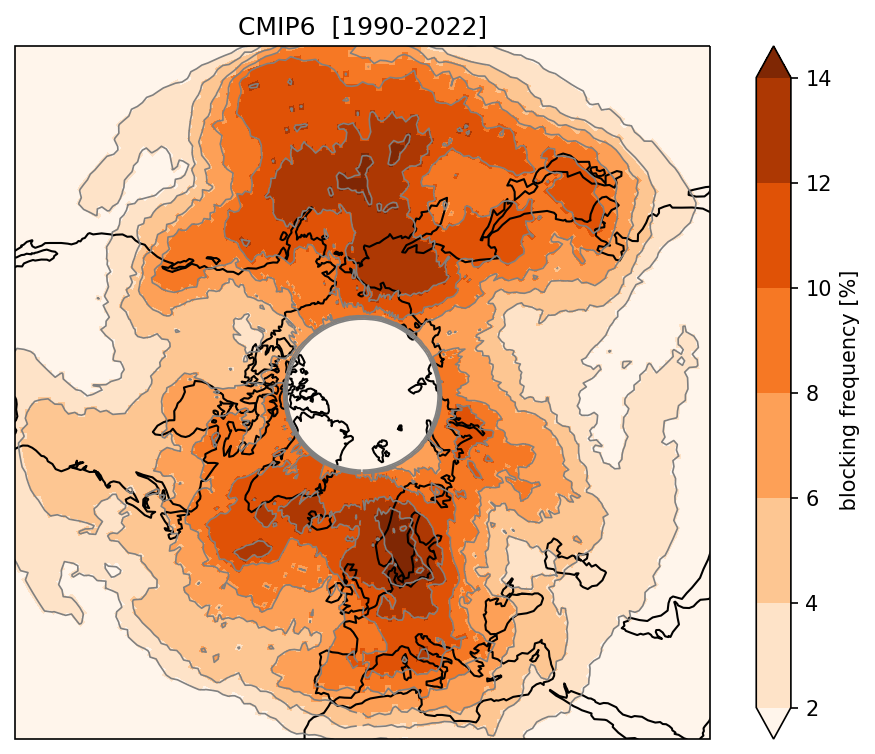

In [5]:
###### ANO Z500 index plot 
mlevels=np.arange(2,16,2)
lon_0 = -35.0
lat_0 =  70.0
#fig, ax1 = plt.subplots(1, 1, figsize=(16, 10), dpi=150, subplot_kw={'projection':  ccrs.Orthographic(lon_0, lat_0)})
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
###==== first panel
im1=(feq_icon_ngc3028.seasonalmean_object_id[0,...]*100).plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
(feq_icon_ngc3028.seasonalmean_object_id[0,...]*100).plot.contour(ax=ax1,colors='grey', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax1.coastlines();

ax1.set_title('CMIP6  [1990-2022]')

In [34]:
### prepare era5 
###===lon to 0 to 359
feq_era5['lon']=feq_era5['lon']+180
feq_era5=feq_era5.roll(lon=180)


#feq_icon_ngc2013

In [30]:
sims_lon=feq_icon_ngc2013.lon
sims_lat=feq_icon_ngc2013.lat
#print(sims_lon,sims_lat)
feq_era5_reg = feq_era5.interp(lon=sims_lon,lat=sims_lat)
feq_era5_reg

<xarray.Dataset>
Dimensions:                 (time: 4, lat: 180, lon: 360)
Coordinates:
  * time                    (time) object 0001-01-01 00:00:00 ... 0001-10-01 ...
  * lon                     (lon) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    seasonalmean_object_id  (time, lat, lon) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [36]:
feq_cmip6=xr.open_dataset('/scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r2i1p1f1/factory/tempest/cmip6_blocking_climo.nc')
feq_cmip6

### prepare cmip6 
###===lon to 0 to 359
feq_cmip6['lon']=feq_cmip6['lon']+180
feq_cmip6=feq_cmip6.roll(lon=180)

feq_cmip6

<xarray.Dataset>
Dimensions:                 (time: 4, lat: 180, lon: 360)
Coordinates:
  * time                    (time) object 0001-01-01 00:00:00 ... 0001-10-01 ...
  * lat                     (lat) float64 -90.0 -89.0 -88.0 ... 87.0 88.0 89.0
  * lon                     (lon) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
Data variables:
    seasonalmean_object_id  (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [37]:
sims_lon=feq_icon_ngc2013.lon
sims_lat=feq_icon_ngc2013.lat
#print(sims_lon,sims_lat)
feq_cmip6_reg = feq_cmip6.interp(lon=sims_lon,lat=sims_lat)
feq_cmip6_reg

<xarray.Dataset>
Dimensions:                 (time: 4, lat: 180, lon: 360)
Coordinates:
  * time                    (time) object 0001-01-01 00:00:00 ... 0001-10-01 ...
  * lon                     (lon) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
Data variables:
    seasonalmean_object_id  (time, lat, lon) float64 0.0 0.0 0.0 ... nan nan nan

Text(0.5, 1.0, 'CMIP6  [1990-2022]')

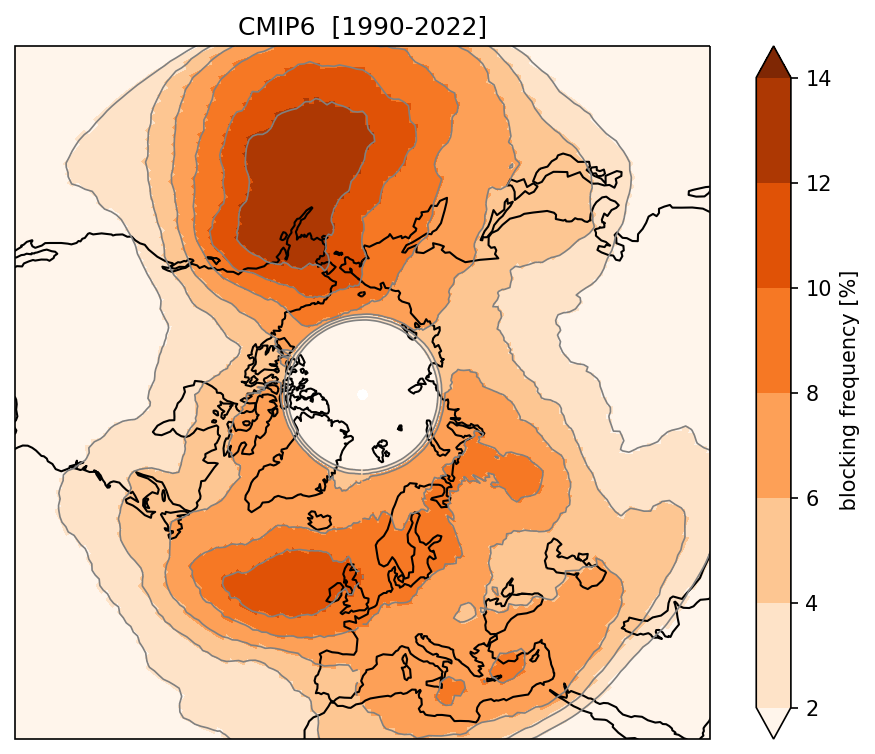

In [40]:
###### ANO Z500 index plot 
mlevels=np.arange(2,16,2)
lon_0 = -35.0
lat_0 =  70.0
#fig, ax1 = plt.subplots(1, 1, figsize=(16, 10), dpi=150, subplot_kw={'projection':  ccrs.Orthographic(lon_0, lat_0)})
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
###==== first panel
im1=(feq_cmip6_reg.seasonalmean_object_id[0,...]*100).plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
(feq_cmip6_reg.seasonalmean_object_id[0,...]*100).plot.contour(ax=ax1,colors='grey', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())

ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax1.coastlines();

ax1.set_title('CMIP6  [1990-2022]')

In [38]:
### computing BIAS
#bias_icon =  feq_icon_ngc2013 - feq_era5
bias_icon_DJF =  feq_icon_ngc2013.seasonalmean_object_id[0,...] - feq_era5_reg.seasonalmean_object_id[0,...]
bias_cmip6_DJF =  feq_cmip6_reg.seasonalmean_object_id[0,...] - feq_era5_reg.seasonalmean_object_id[0,...]
bias_cmip6_DJF

<xarray.DataArray 'seasonalmean_object_id' (lat: 180, lon: 360)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    time     object 0001-01-01 00:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

Text(0.5, 1.0, 'b) CMIP6 BIAS FROM ERA5 (1990-2022)')

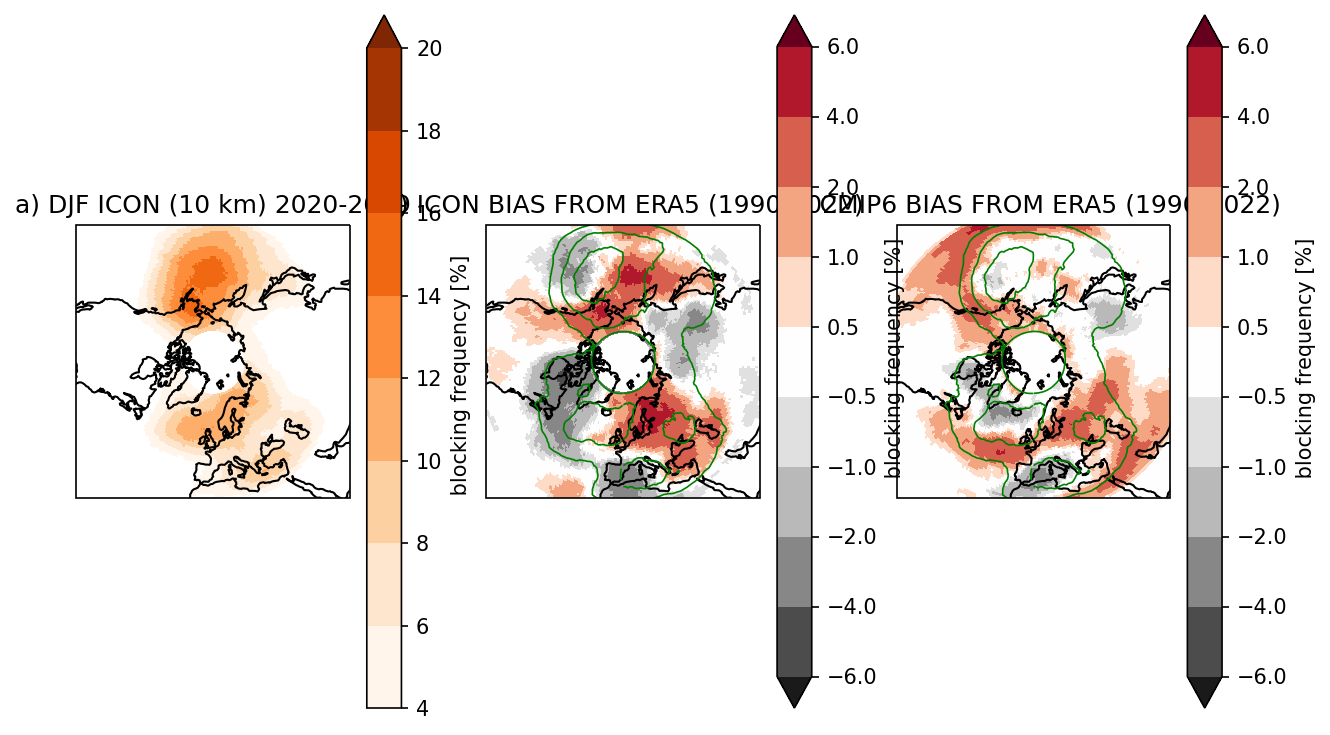

In [39]:
#BIAS model - era5
clevels=[-6,-4,-2,-1,-0.5,0.5,1,2,4,6]
mlevels=np.arange(4,22,2)
#fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.Robinson(central_longitude=0, globe=None)})
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})

###==== first panel
im=(feq_icon_ngc2013.seasonalmean_object_id[0,...]*100).plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) DJF ICON (10 km) 2020-2049')

###==== second panel
im=(bias_icon_DJF*100).plot(ax=ax2,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
(feq_era5_reg.seasonalmean_object_id[0,...]*100).plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=np.arange(4,20,4), transform=ccrs.PlateCarree())
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('b) ICON BIAS FROM ERA5 (1990-2022)')

###==== second panel
im=(bias_cmip6_DJF*100).plot(ax=ax3,levels=clevels, cmap='RdGy_r', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]'})
(feq_era5_reg.seasonalmean_object_id[0,...]*100).plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=np.arange(4,20,4), transform=ccrs.PlateCarree())
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('b) CMIP6 BIAS FROM ERA5 (1990-2022)')

## CYCLONE IDENTIFICATION

In [5]:
cesm_cyc=xr.open_dataset('/home/b/b382006/tools/cyc/tempest/composite_PSL.nc')
cesm_cyc

<xarray.Dataset>
Dimensions:  (x: 80, y: 80)
Coordinates:
  * x        (x) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 36.5 37.5 38.5 39.5
  * y        (y) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 36.5 37.5 38.5 39.5
Data variables:
    psl      (y, x) float32 ...

In [6]:
#cesm_cyc.psl.plot()
(cesm_cyc.psl*0.01)
#cesm_cyc.x

<xarray.DataArray 'psl' (y: 80, x: 80)>
array([[ 49.94578 ,  51.125538,  49.95909 , ...,  83.40472 ,  82.2613  ,
         78.806404],
       [ 53.432266,  52.278423,  52.283115, ...,  86.87205 ,  86.877945,
         83.42017 ],
       [ 56.91593 ,  59.24793 ,  58.08931 , ...,  88.02061 ,  86.87054 ,
         85.715744],
       ...,
       [306.71918 , 308.90262 , 309.88055 , ..., 246.77736 , 242.25613 ,
        238.97968 ],
       [305.4691  , 306.4388  , 308.6067  , ..., 244.42252 , 241.09521 ,
        236.60565 ],
       [303.07492 , 302.9513  , 307.40726 , ..., 239.81526 , 238.75377 ,
        238.8963  ]], dtype=float32)
Coordinates:
  * x        (x) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 36.5 37.5 38.5 39.5
  * y        (y) float64 -39.5 -38.5 -37.5 -36.5 -35.5 ... 36.5 37.5 38.5 39.5

(-20.0, 20.0)

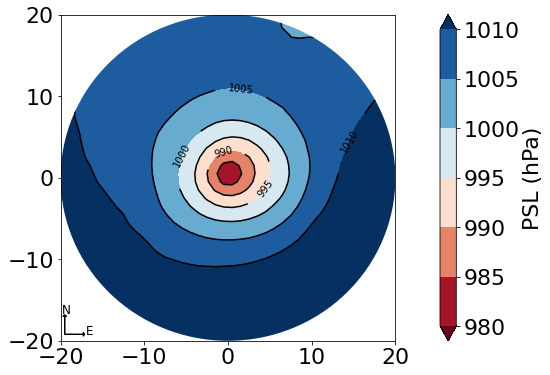

In [35]:
from scipy.ndimage import gaussian_filter
import matplotlib.patches as patches 

X=np.arange(-39.5, 39.5, 0.5)
Y=np.arange(-39.5, 39.5, 0.5)
center_x= 0
center_y= 0
radius  = 20

clevels = np.arange(980,1015,5)

fig,ax = plt.subplots(figsize=(8,6))
cf = plt.contour(cesm_cyc.x,cesm_cyc.y,(cesm_cyc.psl*0.01),levels=clevels,colors='k')
cfb=plt.clabel(cf, inline=1, fontsize=10,fmt='%2.0f')
cs = plt.contourf(cesm_cyc.x,cesm_cyc.y,(cesm_cyc.psl*0.01),levels=clevels, cmap='RdBu',extend='both')
plt.rcParams.update({'font.size': 22})
plt.tick_params(labelsize=22)
plt.colorbar(label='PSL (hPa)',orientation='vertical',pad=0.10)

circ = patches.Circle((center_x, center_y), radius, facecolor='none')
ax.add_patch(circ)
#    # Plot the outline
for coll in cs.collections:
    coll.set_clip_path(circ)

for coll in cf.collections:
    coll.set_clip_path(circ)
        
    # Remove label outside of circle area
for text_object in cfb:
    px,py= text_object.get_position()
    radi=(px*px+py*py)**0.5
    if radi > radius:
        text_object.set_visible(False)
## Arrows North and East
plt.arrow( -19.5, -19.2, 0, 2.2, fc="k", ec="k",head_width=0.5, head_length=0.2 )
plt.arrow( -19.5, -19.2, 2.2, 0, fc="k", ec="k",head_width=0.5, head_length=0.2 )
ax.text(-19.9,-16.6,'N',fontsize=12)
ax.text(-17.0,-19.2,'E',fontsize=12)
###Arrow Storm direction
#    plt.arrow( -9.5, -9.2, 2.2, 0, fc="k", ec="k",head_width=0.5, head_length=0.2 )
#    ax.text(-7.0,-9.2,'Storm direction',fontsize=12)
plt.xlim([-20, 20])
plt.ylim([-20, 20])


In [1]:
### read info skiping the line which contains "s"
import pandas as pd
from scipy.interpolate import griddata
#import rasterio
#from rasterio.crs import CRS
import numpy as np
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import cm
import sys, os, argparse
import bottleneck

In [2]:
### nextGEMS models ICON NGC2018

In [12]:
ngc2013_cyc =  pd.read_csv('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/storms/tempest/etc-all-traj.txt',header=None,delim_whitespace=True, comment='s')
ngc2013_cyc.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
ngc2013_cyc_stg =  pd.read_csv('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/storms/tempest/etc-strong-traj.txt',header=None,delim_whitespace=True, comment='s')
ngc2013_cyc_stg.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
years_ngc2013=ngc2013_cyc_stg['year'].max() - ngc2013_cyc_stg['year'].min()
years_ngc2013

30

In [8]:
### nextGEMS models ICON NGC3028

In [13]:
ngc3028_cyc =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/ngc3028/storms/tempest/etc-all-traj.txt',header=None,delim_whitespace=True, comment='s')
ngc3028_cyc.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
ngc3028_cyc_stg =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/ngc3028/storms/tempest/etc-strong-traj.txt',header=None,delim_whitespace=True, comment='s')
ngc3028_cyc_stg.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
years_ngc3028=ngc3028_cyc_stg['year'].max() - ngc3028_cyc_stg['year'].min()
years_ngc3028

5

In [56]:
### preparing to compute track dentisty 

In [10]:
### saving only coordinates
### changing longitudes to -180,180
#cesm2_cyc_df['lon3'] = cesm2_cyc_df[['lon']].add(-360).where(cesm2_cyc_df['lon'] > 180)
ngc3028_cyc['lon3'] = np.where(ngc3028_cyc['lon'] > 180, ngc3028_cyc['lon']-360,ngc3028_cyc['lon'])

### save lon3, lat
header = ["lon3", "lat"]
ngc3028_cyc.to_csv('/home/b/b382006/tools/gridding/tmp_etc-all-traj.txt', sep=' ', columns = header,index=False, header=False)

In [11]:
### saving only coordinates for strong cyclones
### changing longitudes to -180,180
#cesm2_cyc_df['lon3'] = cesm2_cyc_df[['lon']].add(-360).where(cesm2_cyc_df['lon'] > 180)
ngc3028_cyc_stg['lon3'] = np.where(ngc3028_cyc_stg['lon'] > 180, ngc3028_cyc_stg['lon']-360,ngc3028_cyc_stg['lon'])

### save lon3, lat
header = ["lon3", "lat"]
ngc3028_cyc_stg.to_csv('/home/b/b382006/tools/gridding/tmp_etc-stg-traj.txt', sep=' ', columns = header,index=False, header=False)

In [57]:
### nextGEMS models IFS 4.4 km

In [14]:
ifs4km_cyc =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/IFS_4.4-FESOM_5/storms/tempest/etc-all-traj.txt',header=None,delim_whitespace=True, comment='s')
ifs4km_cyc.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
ifs4km_cyc_stg =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/IFS_4.4-FESOM_5/storms/tempest/etc-strong-traj.txt',header=None,delim_whitespace=True, comment='s')
ifs4km_cyc_stg.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
years_ifs4km=ifs4km_cyc_stg['year'].max() - ifs4km_cyc_stg['year'].min()
years_ifs4km

5

In [22]:
### preparing to compute track dentisty 

In [23]:
### saving only coordinates
### changing longitudes to -180,180
ifs4km_cyc['lon3'] = np.where(ifs4km_cyc['lon'] > 180, ifs4km_cyc['lon']-360,ifs4km_cyc['lon'])

### save lon3, lat
header = ["lon3", "lat"]
ifs4km_cyc.to_csv('/home/b/b382006/tools/gridding/tmp_etc-all-traj.txt', sep=' ', columns = header,index=False, header=False)

In [24]:
### strong cyclones
ifs4km_cyc_stg['lon3'] = np.where(ifs4km_cyc_stg['lon'] > 180, ifs4km_cyc_stg['lon']-360,ifs4km_cyc_stg['lon'])

### save lon3, lat
header = ["lon3", "lat"]
ifs4km_cyc_stg.to_csv('/home/b/b382006/tools/gridding/tmp_etc-stg-traj.txt', sep=' ', columns = header,index=False, header=False)

In [25]:
### Run from gridding.f to get density tracks

In [26]:
### nextGEMS models IFS 28 km

In [15]:
ifs28km_cyc =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/IFS_28-NEMO_25/storms/tempest/etc-all-traj.txt',header=None,delim_whitespace=True, comment='s')
ifs28km_cyc.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
ifs28km_cyc_stg =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/IFS_28-NEMO_25/storms/tempest/etc-strong-traj.txt',header=None,delim_whitespace=True, comment='s')
ifs28km_cyc_stg.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
years_ifs28km=ifs28km_cyc_stg['year'].max() - ifs28km_cyc_stg['year'].min()
years_ifs28km

5

In [28]:
### preparing to compute track dentisty 

In [29]:
### saving only coordinates
### changing longitudes to -180,180
ifs28km_cyc['lon3'] = np.where(ifs28km_cyc['lon'] > 180, ifs28km_cyc['lon']-360,ifs28km_cyc['lon'])

### save lon3, lat
header = ["lon3", "lat"]
ifs28km_cyc.to_csv('/home/b/b382006/tools/gridding/tmp_etc-all-traj.txt', sep=' ', columns = header,index=False, header=False)

In [30]:
### strong cyclones
ifs28km_cyc_stg['lon3'] = np.where(ifs28km_cyc_stg['lon'] > 180, ifs28km_cyc_stg['lon']-360,ifs28km_cyc_stg['lon'])

### save lon3, lat
header = ["lon3", "lat"]
ifs28km_cyc_stg.to_csv('/home/b/b382006/tools/gridding/tmp_etc-stg-traj.txt', sep=' ', columns = header,index=False, header=False)

In [31]:
### Run from gridding.f to get density tracks in: /home/b/b382006/tools/gridding

In [34]:
### ERA5

In [16]:
era5_cyc =  pd.read_csv('/work/bm1235/b382006/era5/storms/tempest/etc-all-traj.txt',header=None,delim_whitespace=True, comment='s')
era5_cyc.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
era5_cyc_stg =  pd.read_csv('/work/bm1235/b382006/era5/storms/tempest/etc-strong-traj.txt',header=None,delim_whitespace=True, comment='s')
era5_cyc_stg.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]


In [17]:
### number of years
years_era5=era5_cyc_stg['year'].max() - era5_cyc_stg['year'].min()
years_era5

32

In [63]:
### preparing to compute track dentisty 

In [15]:
### saving only coordinates
### changing longitudes to -180,180
#cesm2_cyc_df['lon3'] = cesm2_cyc_df[['lon']].add(-360).where(cesm2_cyc_df['lon'] > 180)
era5_cyc['lon3'] = np.where(era5_cyc['lon'] > 180, era5_cyc['lon']-360,era5_cyc['lon'])

### save lon3, lat
header = ["lon3", "lat"]
era5_cyc.to_csv('/home/b/b382006/tools/gridding/tmp_etc-all-traj.txt', sep=' ', columns = header,index=False, header=False)

In [16]:
### saving only coordinates for strong cyclones
### changing longitudes to -180,180
#cesm2_cyc_df['lon3'] = cesm2_cyc_df[['lon']].add(-360).where(cesm2_cyc_df['lon'] > 180)
era5_cyc_stg['lon3'] = np.where(era5_cyc_stg['lon'] > 180, era5_cyc_stg['lon']-360,era5_cyc_stg['lon'])

### save lon3, lat
header = ["lon3", "lat"]
era5_cyc_stg.to_csv('/home/b/b382006/tools/gridding/tmp_etc-stg-traj.txt', sep=' ', columns = header,index=False, header=False)

In [4]:
#cesm2_cyc_df[0:2000]#.iloc[188]
### Run from gridding.f to get density tracks

### Loading density

In [5]:
### results from gridding.f 
ngc2013_stks=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/storms/tempest/density_etc-all-traj.cdf')
ngc2013_stks_stg=xr.open_dataset('/work/bm1235/b382006/regridding/icon/ngc2013_10km_to_1degree/storms/tempest/density_etc-stg-traj.cdf')
#density

In [6]:
### results from gridding.f 
ngc3028_stks=xr.open_dataset('/work/bm1235/b382006/regridding/cycle3/ngc3028/storms/tempest/density_etc-all-traj.cdf')
ngc3028_stks_stg=xr.open_dataset('/work/bm1235/b382006/regridding/cycle3/ngc3028/storms/tempest/density_etc-stg-traj.cdf')
#density

In [7]:
### results from gridding.f 
ifs4km_stks=xr.open_dataset('/work/bm1235/b382006/regridding/cycle3/IFS_4.4-FESOM_5/storms/tempest/density_etc-all-traj.cdf')
ifs4km_stks_stg=xr.open_dataset('/work/bm1235/b382006/regridding/cycle3/IFS_4.4-FESOM_5/storms/tempest/density_etc-stg-traj.cdf')

In [8]:
### results from gridding.f 
ifs28km_stks=xr.open_dataset('/work/bm1235/b382006/regridding/cycle3/IFS_28-NEMO_25/storms/tempest/density_etc-all-traj.cdf')
ifs28km_stks_stg=xr.open_dataset('/work/bm1235/b382006/regridding/cycle3/IFS_28-NEMO_25/storms/tempest/density_etc-stg-traj.cdf')

In [9]:
### ERA5
era5_stks=xr.open_dataset('/work/bm1235/b382006/era5/storms/tempest/density_etc-all-traj.cdf')
era5_stks_stg=xr.open_dataset('/work/bm1235/b382006/era5/storms/tempest/density_etc-stg-traj.cdf')

In [10]:
#era5_stks_stg['N'].plot()
#data.plot()
#ngc3028_stks_stg['N'].plot()

In [18]:
## Computing density
dx = 1   # taken from inputfile
dy = 1   # taken from inputfile
lon = np.arange(-180,181,dx)    
lat = np.arange(-90,91,dy)

# Values weight/area
ngrid=793650.794 #500 km


###========== full
### ERA5
era5_den = era5_stks['N']
era5_den = np.squeeze(era5_den)*ngrid*(1/years_era5)
era5_den /=12 ##cyclone per month

### nextgems
ngc2013_den = ngc2013_stks['N']
ngc2013_den = np.squeeze(ngc2013_den)*ngrid*(1/years_ngc2013)
ngc2013_den /=12 ##cyclone per month

ngc3028_den = ngc3028_stks['N']
ngc3028_den = np.squeeze(ngc3028_den)*ngrid*(1/years_ngc3028)
ngc3028_den /=12 ##cyclone per month

ifs4km_den = ifs4km_stks['N']
ifs4km_den = np.squeeze(ifs4km_den)*ngrid*(1/years_ifs4km)
ifs4km_den /=12 ##cyclone per month

ifs28km_den = ifs28km_stks['N']
ifs28km_den = np.squeeze(ifs28km_den)*ngrid*(1/years_ifs28km)
ifs28km_den /=12 ##cyclone per month

###========= stronger
###ERA5
era5_den_stg = era5_stks_stg['N']
era5_den_stg = np.squeeze(era5_den_stg)*ngrid*(1/years_era5)
era5_den_stg /=12 ##cyclone per month

## nextgems
ngc2013_den_stg = ngc2013_stks_stg['N']
ngc2013_den_stg = np.squeeze(ngc2013_den_stg)*ngrid*(1/years_ngc2013)
ngc2013_den_stg /=12 ##cyclone per month

ngc3028_den_stg = ngc3028_stks_stg['N']
ngc3028_den_stg = np.squeeze(ngc3028_den_stg)*ngrid*(1/years_ngc3028)
ngc3028_den_stg /=12 ##cyclone per month

ifs4km_den_stg = ifs4km_stks_stg['N']
ifs4km_den_stg = np.squeeze(ifs4km_den_stg)*ngrid*(1/years_ifs4km)
ifs4km_den_stg /=12 ##cyclone per month

ifs28km_den_stg = ifs28km_stks_stg['N']
ifs28km_den_stg = np.squeeze(ifs28km_den_stg)*ngrid*(1/years_ifs28km)
ifs28km_den_stg /=12 ##cyclone per month

In [19]:
### corecction x direction
era5_den=era5_den.roll(dimx_N=180)
era5_den_stg=era5_den_stg.roll(dimx_N=180)


In [20]:
### BIAS
### full
bias_ngc2013 = ngc2013_den - era5_den 
bias_ngc3028 = ngc3028_den - era5_den 
bias_ifs4km = ifs4km_den - era5_den 
bias_ifs28km = ifs28km_den - era5_den 

### strong
bias_ngc2013_stg =  ngc2013_den_stg - era5_den_stg 
bias_ngc3028_stg =  ngc3028_den_stg - era5_den_stg 
bias_ifs4km_stg =  ifs4km_den_stg - era5_den_stg 
bias_ifs28km_stg =  ifs28km_den_stg - era5_den_stg 

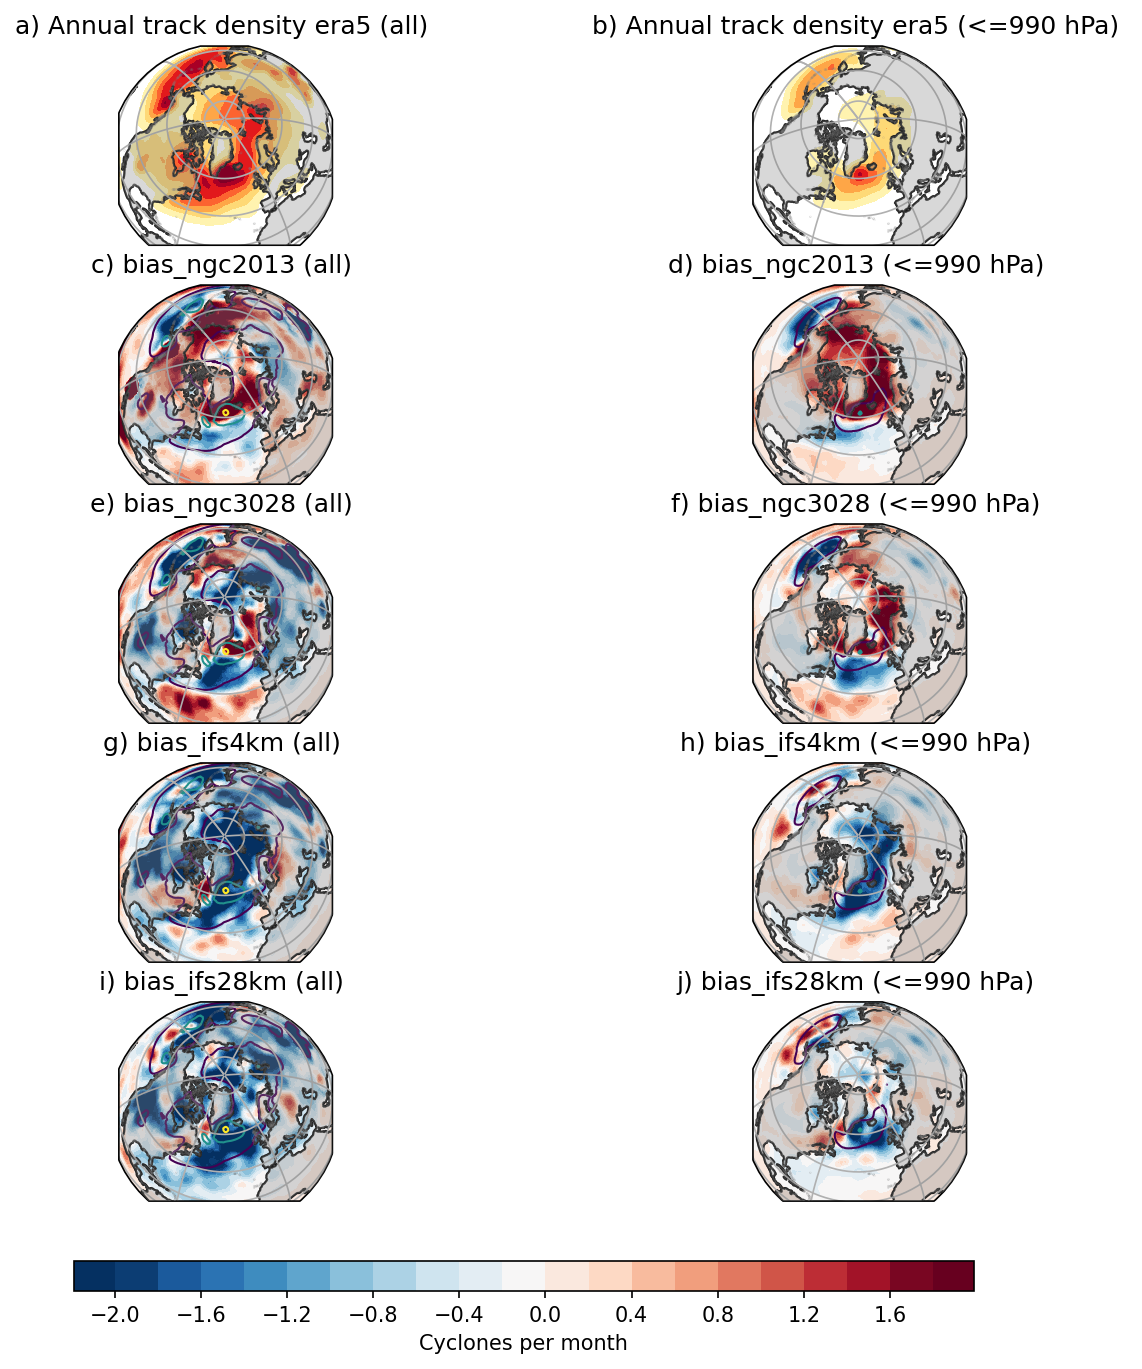

In [22]:
import cartopy.feature as cfeature
lon_0 = -35.0
lat_0 =  70.0
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6), (ax7,ax8), (ax9,ax10)) = plt.subplots(5, 2, figsize=(10, 10),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#theta = np.linspace(0, 2*np.pi, 100)
#center, radius = [0.5, 0.5], 0.5
#verts = np.vstack([np.sin(theta), np.cos(theta)]).T
#circle = mpath.Path(verts * radius + center)
#ax1.set_boundary(circle, transform=ax.transAxes)

###==== first panel era5, ngc2013,  ngc3028,  ifs4km,  ifs28km

mm=ax1.contourf(lon,\
                  lat,\
                  era5_den,\
                  levels=np.arange(2,16,2), \
                  transform=ccrs.PlateCarree(),cmap='YlOrRd', extend='max' )
ax1.coastlines();
ax1.gridlines()
ax1.set_extent([-180, 180,20, 90], crs=ccrs.PlateCarree())
ax1.set_title('a) Annual track density era5 (all) ')
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)


###==== second panel
mm=ax2.contourf(lon,\
                  lat,\
                  era5_den_stg,\
                  levels=np.arange(2,16,2), \
                  transform=ccrs.PlateCarree(),cmap='YlOrRd', extend='max' )
ax2.coastlines();
ax2.gridlines()
ax2.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax2.set_title('b) Annual track density era5 (<=990 hPa) ')
ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)


###==== third panel
mm=ax3.contourf(lon,\
                  lat,\
                  bias_ngc2013,\
                  levels=np.arange(-2,2,0.2), \
                  transform=ccrs.PlateCarree(),cmap='RdBu_r', extend='both' )

mc=ax3.contour(lon,\
                  lat,\
                  era5_den,\
                  levels=np.arange(6,24,6), linewidths=1, \
                  transform=ccrs.PlateCarree())
ax3.coastlines();
ax3.gridlines()
ax3.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax3.set_title('c) bias_ngc2013 (all) ')
ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###==== fourth panel
mm=ax4.contourf(lon,\
                  lat,\
                  bias_ngc2013_stg,\
                  levels=np.arange(-2,2,0.2), \
                  transform=ccrs.PlateCarree(),cmap='RdBu_r', extend='both' )
mc=ax4.contour(lon,\
                  lat,\
                  era5_den_stg,\
                  levels=np.arange(6,24,6), linewidths=1, \
                  transform=ccrs.PlateCarree())
ax4.coastlines();
ax4.gridlines()
ax4.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax4.set_title('d) bias_ngc2013 (<=990 hPa) ')
ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###==== ngc3028
mm=ax5.contourf(lon,\
                  lat,\
                  bias_ngc3028,\
                  levels=np.arange(-2,2,0.2), \
                  transform=ccrs.PlateCarree(),cmap='RdBu_r', extend='both' )
mc=ax5.contour(lon,\
                  lat,\
                  era5_den,\
                  levels=np.arange(6,24,6), linewidths=1, \
                  transform=ccrs.PlateCarree())
ax5.coastlines();
ax5.gridlines()
ax5.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax5.set_title('e) bias_ngc3028 (all) ')
ax5.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###====  
mm=ax6.contourf(lon,\
                  lat,\
                  bias_ngc3028_stg,\
                  levels=np.arange(-2,2,0.2), \
                  transform=ccrs.PlateCarree(),cmap='RdBu_r', extend='both' )
mc=ax6.contour(lon,\
                  lat,\
                  era5_den_stg,\
                  levels=np.arange(6,24,6), linewidths=1, \
                  transform=ccrs.PlateCarree())
ax6.coastlines();
ax6.gridlines()
ax6.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax6.set_title('f) bias_ngc3028 (<=990 hPa) ')
ax6.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###==== ifs4km
mm=ax7.contourf(lon,\
                  lat,\
                  bias_ifs4km,\
                  levels=np.arange(-2,2,0.2), \
                  transform=ccrs.PlateCarree(),cmap='RdBu_r', extend='both' )
mc=ax7.contour(lon,\
                  lat,\
                  era5_den,\
                  levels=np.arange(6,24,6), linewidths=1, \
                  transform=ccrs.PlateCarree())
ax7.coastlines();
ax7.gridlines()
ax7.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax7.set_title('g) bias_ifs4km (all) ')
ax7.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###==== 
mm=ax8.contourf(lon,\
                  lat,\
                  bias_ifs4km_stg,\
                  levels=np.arange(-2,2,0.2), \
                  transform=ccrs.PlateCarree(),cmap='RdBu_r', extend='both' )
mc=ax8.contour(lon,\
                  lat,\
                  era5_den_stg,\
                  levels=np.arange(6,24,6), linewidths=1, \
                  transform=ccrs.PlateCarree())
ax8.coastlines();
ax8.gridlines()
ax8.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax8.set_title('h) bias_ifs4km (<=990 hPa) ')
ax8.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###==== ifs28km
mm=ax9.contourf(lon,\
                  lat,\
                  bias_ifs28km,\
                  levels=np.arange(-2,2,0.2), \
                  transform=ccrs.PlateCarree(),cmap='RdBu_r', extend='both' )
mc=ax9.contour(lon,\
                  lat,\
                  era5_den,\
                  levels=np.arange(6,24,6), linewidths=1, \
                  transform=ccrs.PlateCarree())
ax9.coastlines();
ax9.gridlines()
ax9.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax9.set_title('i) bias_ifs28km (all) ')
ax9.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###==== 
mm=ax10.contourf(lon,\
                  lat,\
                  bias_ifs28km_stg,\
                  levels=np.arange(-2,2,0.2), \
                  transform=ccrs.PlateCarree(),cmap='RdBu_r', extend='both' )
mc=ax10.contour(lon,\
                  lat,\
                  era5_den_stg,\
                  levels=np.arange(6,24,6), linewidths=1, \
                  transform=ccrs.PlateCarree())
ax10.coastlines();
ax10.gridlines()
ax10.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax10.set_title('j) bias_ifs28km (<=990 hPa) ')
ax10.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###=== Add colorbar
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # Left, bottom, width, height.
#cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar = fig.colorbar(mm, cax=cbar_ax, orientation='horizontal', aspect=65, shrink=1, pad=0.05, extendrect='True')
cbar.set_label('Cyclones per month')

In [35]:
### Seasonal
sufix='DJF'
if sufix=='DJF':
    m1=1
    m2=2
    m3=12

In [36]:
cesm2_cyc_df =  pd.read_csv('/home/b/b382006/tools/cyclones/tempest/etc-all-traj.txt',header=None,delim_whitespace=True, comment='s')
cesm2_cyc_stg =  pd.read_csv('/home/b/b382006/tools/cyclones/tempest/etc-strong-traj.txt',header=None,delim_whitespace=True, comment='s')

cesm2_cyc_df.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]
cesm2_cyc_stg.columns = ['lon','id','lon2','lat','pslmin','year','mm', 'dd', 'hh' ]

In [37]:
### saving only coordinates
### changing longitudes to -180,180
cesm2_cyc_df['lon3'] = np.where(cesm2_cyc_df['lon'] > 180, cesm2_cyc_df['lon']-360,cesm2_cyc_df['lon'])

cyc_df = cesm2_cyc_df[(cesm2_cyc_df['mm'] == m1 ) | (cesm2_cyc_df['mm'] == m2 ) | (cesm2_cyc_df['mm'] == m3 )]

### save lon3, lat
header = ["lon3", "lat"]
cyc_df.to_csv('/home/b/b382006/tools/gridding/etc-all-traj_'+sufix+'.txt', sep=' ', columns = header,index=False, header=False)

In [38]:
### saving only coordinates for strong cyclones
### changing longitudes to -180,180
cesm2_cyc_stg['lon3'] = np.where(cesm2_cyc_stg['lon'] > 180, cesm2_cyc_stg['lon']-360,cesm2_cyc_stg['lon'])

cyc_df_stg = cesm2_cyc_stg[(cesm2_cyc_stg['mm'] == m1 ) | (cesm2_cyc_stg['mm'] == m2 ) | (cesm2_cyc_stg['mm'] == m3 )]

### save lon3, lat
header = ["lon3", "lat"]
cyc_df_stg.to_csv('/home/b/b382006/tools/gridding/etc-stg-traj_'+sufix+'.txt', sep=' ', columns = header,index=False, header=False)

In [39]:
### run gridding tool in /home/b/b382006/tools/gridding

In [40]:
### results from gridding.f 
density=xr.open_dataset('/home/b/b382006/tools/gridding/density_etc-all-traj_djf.cdf')
density_stg=xr.open_dataset('/home/b/b382006/tools/gridding/density_etc-stg-traj_djf.cdf')

In [45]:
### computing density per month
##Plotting
#density['N'].plot()
# define grid
dx = 1   # taken from inputfile
dy = 1   # taken from inputfile
lon = np.arange(-180,181,dx)    
lat = np.arange(-90,91,dy)

# Values weight/area
ngrid=793650.794 #500 km

years=30

### full
data = density['N']
data = np.squeeze(data)*ngrid*(1/years)
data /=3 ##cyclone per month

## stronger
data_stg = density_stg['N']
data_stg = np.squeeze(data_stg)*ngrid*(1/years)
data_stg /=3 ##cyclone per month

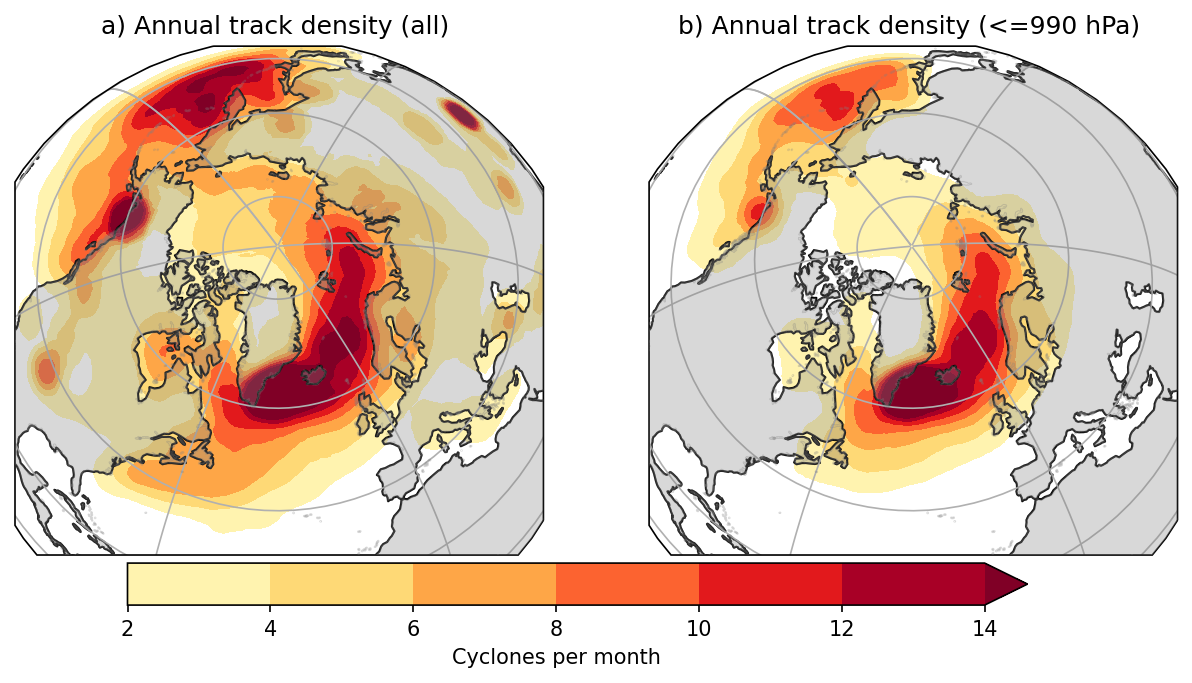

In [46]:
import cartopy.feature as cfeature
lon_0 = -35.0
lat_0 =  70.0
fig, ((ax1,ax2)) = plt.subplots(1, 2, figsize=(10, 14),dpi=150, subplot_kw={'projection': ccrs.Orthographic(lon_0, lat_0)})
#theta = np.linspace(0, 2*np.pi, 100)
#center, radius = [0.5, 0.5], 0.5
#verts = np.vstack([np.sin(theta), np.cos(theta)]).T
#circle = mpath.Path(verts * radius + center)
#ax1.set_boundary(circle, transform=ax.transAxes)

###==== first panel

mm=ax1.contourf(lon,\
                  lat,\
                  data,\
                  levels=np.arange(2,16,2), \
                  transform=ccrs.PlateCarree(),cmap='YlOrRd', extend='max' )
ax1.coastlines();
ax1.gridlines()
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.set_title('a) Annual track density (all) ')
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###==== second panel
mm=ax2.contourf(lon,\
                  lat,\
                  data_stg,\
                  levels=np.arange(2,16,2), \
                  transform=ccrs.PlateCarree(),cmap='YlOrRd', extend='max' )
ax2.coastlines();
ax2.gridlines()
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.set_title('b) Annual track density (<=990 hPa) ')
ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

###=== Add colorbar
cbar_ax = fig.add_axes([0.2, 0.35, 0.6, 0.02])  # Left, bottom, width, height.
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Cyclones per month')

In [57]:
### Try regridding with other tools

In [69]:
density=cesm2_cyc_df.groupby(['lon', 'lat']).size().sort_values(ascending=False).reset_index(name='count')
density["count"].values

array([20, 11,  6, ...,  1,  1,  1])

In [56]:
####=========interpolate
# Size of regular grid
ny, nx =181, 360

# Generate a regular grid to interpolate the data.
xi = np.linspace(0, 359, nx)
yi = np.linspace(-90, 90, ny)
#yi

In [98]:
# Interpolate using delaunay triangularization 
zi = griddata((density.lon,density.lat),density["count"].values,(xi[None,:],yi[:,None]),method='linear')
print(np.shape(zi))
np.nanmax(zi)

from scipy.ndimage import gaussian_filter
data=gaussian_filter(zi,sigma=0.5)

(181, 360)


In [100]:
####=========interpolate
# Size of regular grid
ny, nx =181 , 360

# Generate a regular grid to interpolate the data.
xi = np.linspace(0, 359, nx)
yi = np.linspace(-90, 90, ny)

In [101]:
# Interpolate using delaunay triangularization 
zi = griddata((cesm2_cyc_df.lon,cesm2_cyc_df.lat),cesm2_cyc_df.pslmin.values,(xi[None,:],yi[:,None]),method='linear')
print(np.shape(zi))
np.nanmax(zi)

(181, 360)


101995.86647058825